# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ml import *

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

Linear model (simple)

In [4]:
input_dim = len(X[0])
print(input_dim)

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim, [1, 1])

print("Before training:", test_before)

flattened_X = X.flatten()
print(len(flattened_X))

train_linear_model(p_model, input_dim, flattened_X, Y, epochs=10000)


test_after = predict_linear_model_classif(p_model, input_dim , [1, 1])

print("After training:",test_after)

2
[-0.741 -0.777 -0.078]
Before training: -1.0
6
After training: -1.0


Linear model (advanced)

[-0.278  0.956  0.19 ]


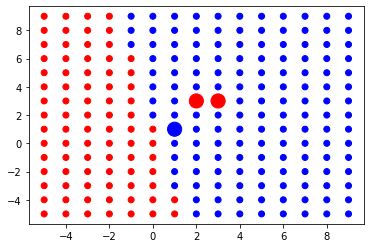

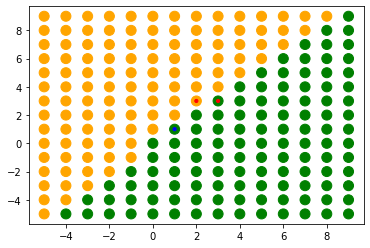

Prediction after training of [1, 1], the prediction need to be equal to 1. 
Prediction: -1.0


In [5]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-5, 10) for x2 in range(-5, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_model(model, input_dim, flattened_dataset_inputs, Y, epochs=10000)


predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['green' if label == 1 else 'orange' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=100)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=10)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim, [1, 1])

print("Prediction after training of [1, 1], the prediction need to be equal to 1. \nPrediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

MLP (simple)

In [356]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1, 1])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("After training:", test_after)

Before training: [0.63574517]
After training: [0.5885443]


MLP (advanced)

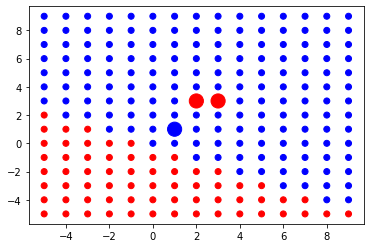

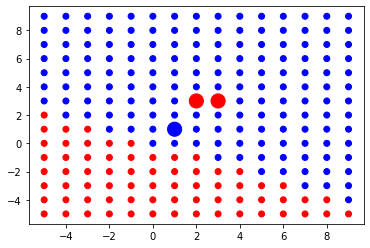

Prediction after training of [1, 1], the result need to be equal to 1. Result: [0.5885443]


In [357]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-5, 10) for x2 in range(-5, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, flattened_dataset_inputs, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

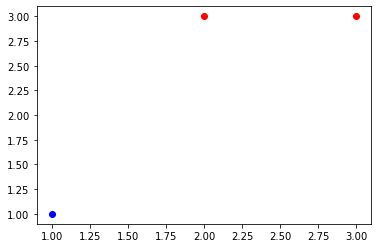

<Figure size 432x288 with 0 Axes>

In [358]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [359]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

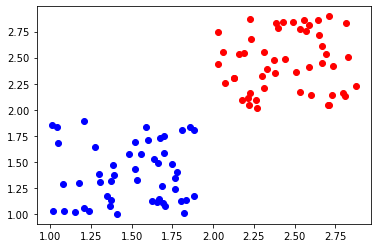

<Figure size 432x288 with 0 Axes>

In [360]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

Linear model (simple)

In [361]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("Before training:", test_before)

flattened_X = X.flatten()

train_linear_model(p_model, input_dim, flattened_X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("After training:",test_after)

Before training: 1.0
After training: 1.0


Linear model (advanced)

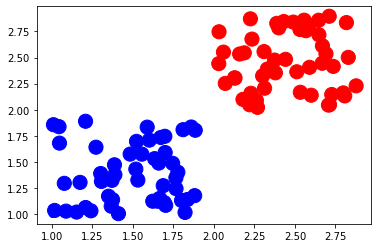

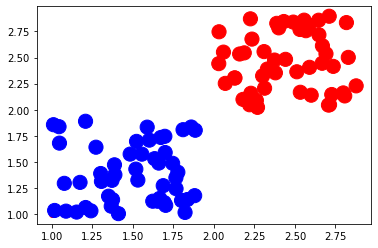

Prediction: 1.0


In [362]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(1, 2) for x2 in range(1, 2)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

MLP (simple)

In [363]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("After training:", test_after)

Before training: [0.30497876]
After training: [-0.48484582]


MLP (advanced)

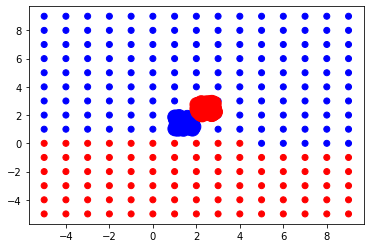

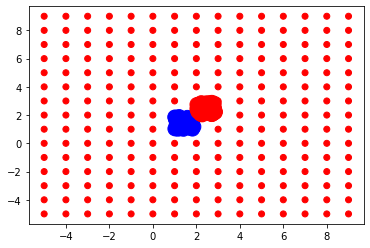

Prediction after training of [1, 1], the result need to be equal to 1. Result: [0.62966734]


In [364]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-5, 10) for x2 in range(-5, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, flattened_dataset_inputs, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [365]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

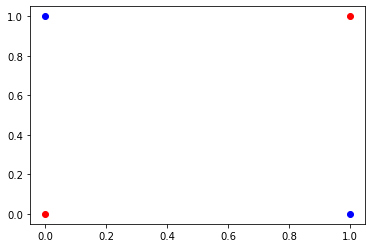

<Figure size 432x288 with 0 Axes>

In [366]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

Linear model (simple)

In [367]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [1, 1])

print("Before training:", test_before)

flattened_X = X.flatten()

train_linear_model(p_model, input_dim, flattened_X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [1, 1])

print("After training:",test_after)

Before training: 1.0
After training: 1.0


Linear model (advanced)

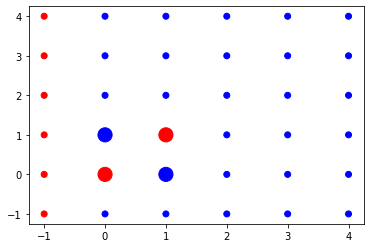

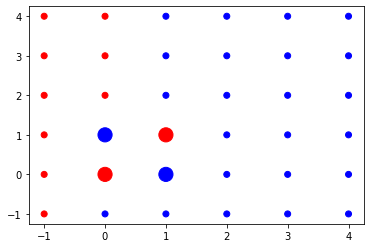

Prediction: 1.0


In [368]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-1, 5) for x2 in range(-1, 5)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

MLP (simple)

In [369]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1, 1])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("After training:", test_after)

Before training: [0.03498574]
After training: [-0.0257598]


MLP (advanced)

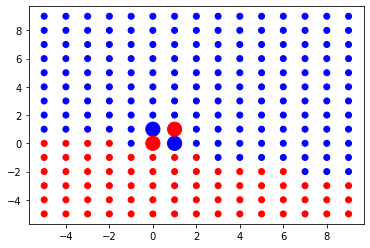

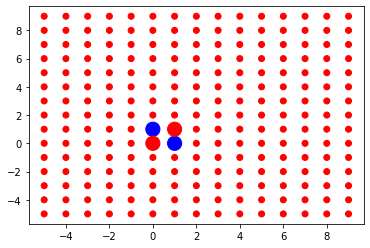

Prediction after training of [1, 1], the result need to be equal to 1. Result: [-0.0257598]


In [370]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-5, 10) for x2 in range(-5, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, flattened_dataset_inputs, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [371]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

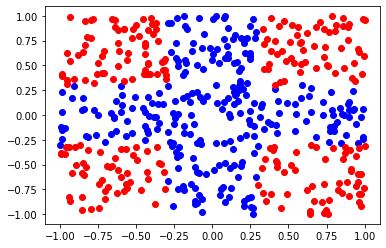

<Figure size 432x288 with 0 Axes>

In [372]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

Linear model (simple)

In [373]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("Before training:", test_before)

flattened_X = X.flatten()

train_linear_model(p_model, input_dim, flattened_X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("After training:",test_after)

Before training: -1.0
After training: -1.0


Linear model (advanced)

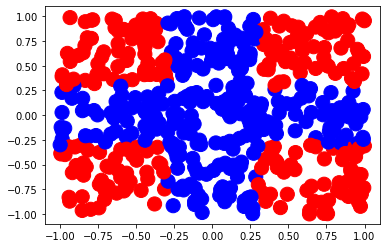

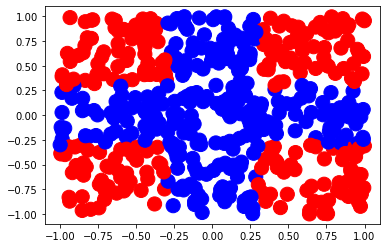

Prediction: -1.0


In [374]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(1, 2) for x2 in range(1, 2)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

MLP (simple)

In [375]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("After training:", test_after)

Before training: [0.9982246]
After training: [0.5730303]


MLP (advanced)

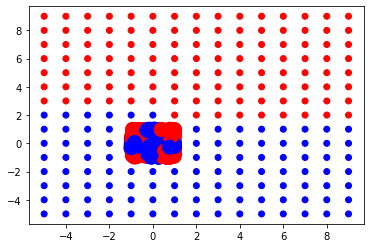

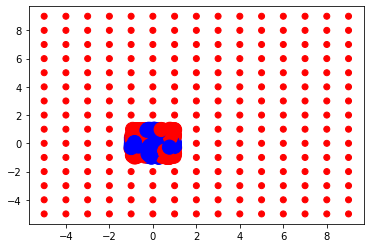

Prediction after training of [1, 1], the result need to be equal to 1. Result: [0.26747295]


In [376]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-5, 10) for x2 in range(-5, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, flattened_dataset_inputs, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [377]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

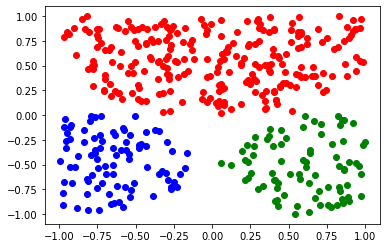

<Figure size 432x288 with 0 Axes>

In [378]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

Linear model (simple)

In [396]:
input_dim = 3

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("Before training:", test_before)

flattened_X = X.flatten()
flattened_Y = Y.flatten()

train_linear_model(p_model, input_dim, flattened_X, flattened_Y)


test_after = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("After training:",test_after)

Before training: 1.0
After training: -1.0


Linear model (advanced)

In [397]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(1, 2) for x2 in range(1, 2)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

MLP (simple)

In [ ]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("After training:", test_after)

MLP (advanced)

In [ ]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-5, 10) for x2 in range(-5, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, flattened_dataset_inputs, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

Linear model (simple)

In [ ]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("Before training:", test_before)

flattened_X = X.flatten()

train_linear_model(p_model, input_dim, flattened_X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("After training:",test_after)

Linear model (advanced)

In [ ]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(1, 2) for x2 in range(1, 2)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

MLP (simple)

In [ ]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("After training:", test_after)

MLP (advanced)

In [ ]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(-5, 10) for x2 in range(-5, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, flattened_dataset_inputs, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()